# 서울시 CCTV 현황 분석 및 인구 현황 분석

### CCTV 설치현황

In [1]:
import pandas as pd

In [2]:
CCTV_seoul = pd.read_excel("data/CCTV_in_Seoul_2018.xlsx")
CCTV_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
# 컬럼 확인 
CCTV_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [4]:
CCTV_seoul.columns[0]

'기관명'

In [5]:
# 기관명 -> 구별로 변경 
CCTV_seoul.rename(columns={"기관명":"구별"},inplace=True)

In [6]:
CCTV_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
# NaN을 확인하고 NaN을 0으로 대체 
CCTV_seoul.isnull().sum()

구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [8]:
CCTV_seoul=CCTV_seoul.fillna(0)

In [9]:
CCTV_seoul.isnull().sum()

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

---
### 서울 인구 데이터프레임

In [10]:
seoul_pop = pd.read_excel("data/population_in_Seoul_2020.xlsx")
seoul_pop.head()
# 1,3,6,9,13

,report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,세대당인구,65세이상고령자
1,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
2,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
4,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073


In [11]:
seoul_pop2 =seoul_pop.iloc[:,[1,3,6,9,13]]
seoul_pop2.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 6,Unnamed: 9,Unnamed: 13
0,자치구,인구,인구,인구,65세이상고령자
1,자치구,합계,한국인,등록외국인,65세이상고령자
2,자치구,계,계,계,65세이상고령자
3,합계,10013781,9733655,280126,1518239
4,종로구,161984,151217,10767,28073


In [12]:
seoul_pop2.columns =['자치구','계','계.1','계2','65세이상고령자']

In [13]:
seoul_pop2.head()

,자치구,계,계.1,계2,65세이상고령자
0,자치구,인구,인구,인구,65세이상고령자
1,자치구,합계,한국인,등록외국인,65세이상고령자
2,자치구,계,계,계,65세이상고령자
3,합계,10013781,9733655,280126,1518239
4,종로구,161984,151217,10767,28073


In [14]:
# 불러올 때 부분만 가져오기 
pop_seoul = pd.read_excel("data/population_in_Seoul_2020.xlsx",
                        header=3,      # 헤더를 쓸 행의 번호  
                        usecols="B,D,G,J,N"         # 엑셀에서만 가능함 
)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [15]:
# 이름변경 
pop_seoul.columns =['구별','인구수','한국인','외국인','고령자']

In [16]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [17]:
# 합계 행 삭제
# pop_seoul=pop_seoul.iloc[1:,:]

In [18]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [19]:
#2 
#pop_seoul.drop(0,inplace=True)  # 행기준이 디폴트 값

### CCTV 현황


In [20]:
# CCTV에서 소계로 오름차순 정렬
CCTV_seoul.sort_values(by='소계', inplace= True)

In [21]:
CCTV_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구,중랑구,강북구,종로구, 중구 순이다

In [22]:
# CCTV에서 소계로 내림차순 정렬
CCTV_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [23]:
### 최근 3년간 CCTV 증가율을 구해서 제일 많이 증가한 구를 검색 후 정렬
# 2016 ~2018 의 갯수와 나머지총합를 비교 

In [24]:
# 3년간 합 
CCTV_seoul['최근증가율'] = ((CCTV_seoul[['2016년','2017년','2018년']].sum(axis=1))/(CCTV_seoul.iloc[:,2:7].sum(axis=1))  ) *100
#election['electionSum']= election[['이재명','윤석열','심상정']].sum(axis=1)


In [25]:
CCTV_seoul.iloc[:,2:7].sum(axis=1)

9      515.0
24     872.0
2      691.0
22     941.0
23     629.0
5      746.0
17     974.0
3      909.0
7      769.0
11     993.0
1     1027.0
8     1342.0
12    1009.0
10    1437.0
20    1841.0
13    1235.0
19    1042.0
15    1251.0
18    1459.0
14    1840.0
21    2070.0
16    1687.0
6     1875.0
4     2001.0
0     3431.0
dtype: float64

In [26]:
# 정렬
CCTV_seoul.sort_values(by="최근증가율",ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과 : 최근 3년간 cctv가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구이다

---
### 인구현황

In [27]:
# 구별 Data의 유효성 확인 
len(pop_seoul['구별'].unique())

26

In [28]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [29]:
pop_seoul['외국인비율']=(pop_seoul['외국인']) / (pop_seoul['인구수']) * 100
pop_seoul['고령자비율']=(pop_seoul['고령자']) / (pop_seoul['인구수']) * 100

In [30]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228


- 인구수가 제일 많은 지역은 송파구이지만, 영등포구가 제일 외국인이 많다.
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.
송파구는 고령자가 제일 많지만 고령자 비율이 높지 않은 것이 확인된다
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 
인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다

---
# cctv의 인구현황 합치기

In [31]:
data_result = pd.merge(CCTV_seoul,pop_seoul, on ='구별')
# 구별 가나다순 정렬
data_result = data_result.sort_values(by='구별')

In [32]:
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
10,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
7,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
23,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [33]:
delColum = data_result.columns[2:10]

for i in delColum:
    del data_result[i]

In [34]:
# index를 구벼롤 
data_result.set_index("구별", inplace= True)

In [35]:
# save as CCTV_Result.csv
data_result.to_csv("data/CCTV_Result.csv", encoding="utf-8")

<AxesSubplot:title={'center':'CCTV소계'}, ylabel='구별'>

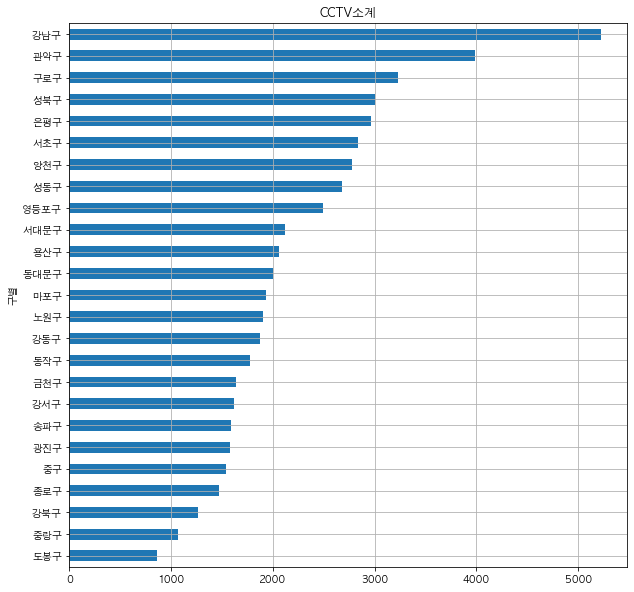

In [36]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 소계 bar chart
data_result['소계'].sort_values().plot(kind='barh', figsize=(10, 10), title='CCTV소계', grid=True)

<AxesSubplot:title={'center':'인구수'}, ylabel='구별'>

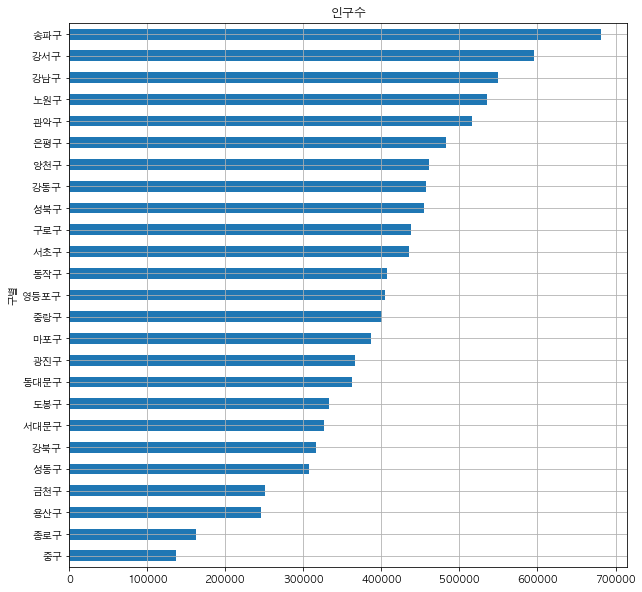

In [37]:
# 인구수 bar chart
data_result['인구수'].sort_values().plot(kind='barh', figsize=(10, 10), title='인구수', grid=True)

### 인구대비 CCTV 비율

<AxesSubplot:title={'center':'CCTV소계 : 인구수 비율'}, ylabel='구별'>

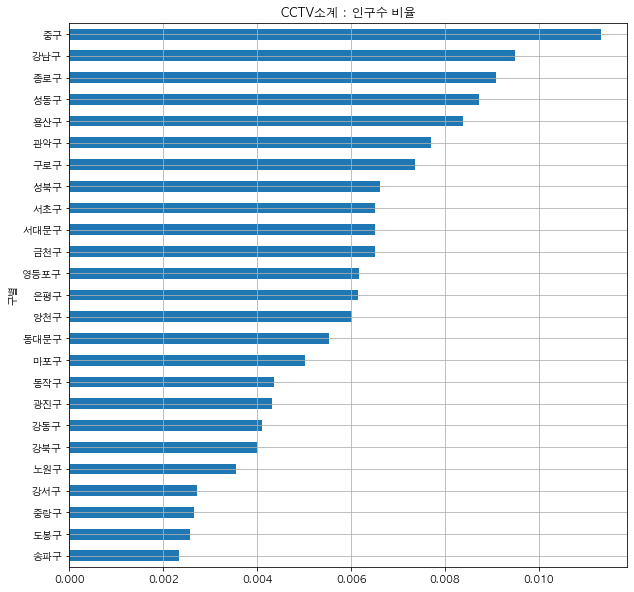

In [38]:
data_result.head()

data_소계_인구수 = data_result.소계 / data_result.인구수
data_소계_인구수.sort_values().plot(kind='barh', figsize=(10, 10), title='CCTV소계 : 인구수 비율', grid=True)

-0.44225082573365776

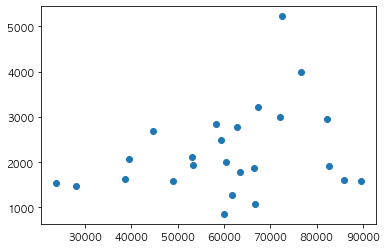

In [39]:
#고령자 / 소계 scatter plot
plt.scatter(data_result['고령자'], data_result['소계'])
# 고령자/소계 correlation
data_result['고령자'].corr(data_result['소계'])
# 고령자비율 / 소계 correlation
data_result['고령자비율'].corr(data_result['소계'])

Text(0, 0.5, 'CCTV')

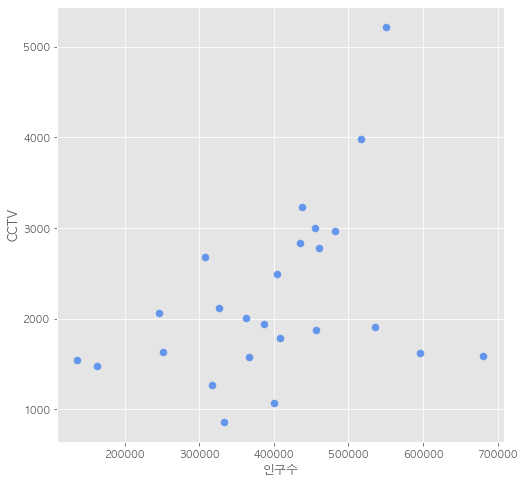

In [40]:
# applegothic 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# plt style
plt.style.use('ggplot')
# plt size
plt.figure(figsize=(8, 8))

# 인구수 / 소계 scatter plot
plt.scatter(data_result['인구수'], data_result['소계'], color='cornflowerblue', s=50)

# xlabel
plt.xlabel('인구수')
# ylabel
plt.ylabel('CCTV')

- 인구수 대비 CCTV 비율 TOP 5는 '중구, 강남구, 종로구, 성동구, 용산구' 이다
- 인구수 대비 CCTV 비율 -TOP 4는 '송파구, 도봉구, 중랑구, 강서구' 이다
- 고령화가 우려되는 지역들은 CCTV 대수가 적다
- 젊은이(Not 고령자) 비율이 높을 수록 CCTV 대수가 많다
- 젊은 것들이 문제다

 
0.002885 x + 1064


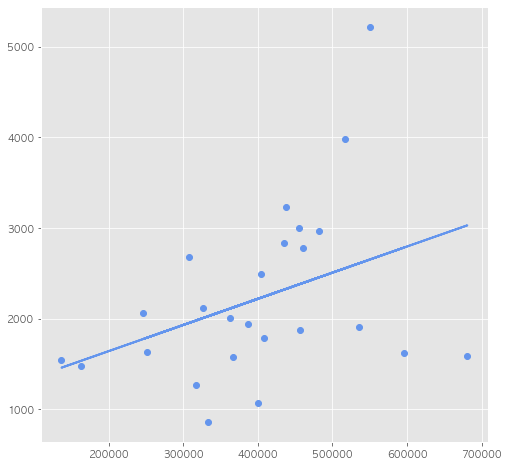

In [41]:
import numpy as np
# 인구수, 소계 회귀선, 평균선 만들기

# plt size
plt.figure(figsize=(8, 8))

plt.plot(data_result['인구수'], data_result['소계'], 'o', color='cornflowerblue')
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)
# 회귀선 만들기
plt.plot(data_result['인구수'], f1(data_result['인구수']), color='cornflowerblue', linewidth=2)

> CCTV 댓수의 기준선

In [42]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
# sort descending
data_result = data_result.sort_values(by='오차', ascending=False)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


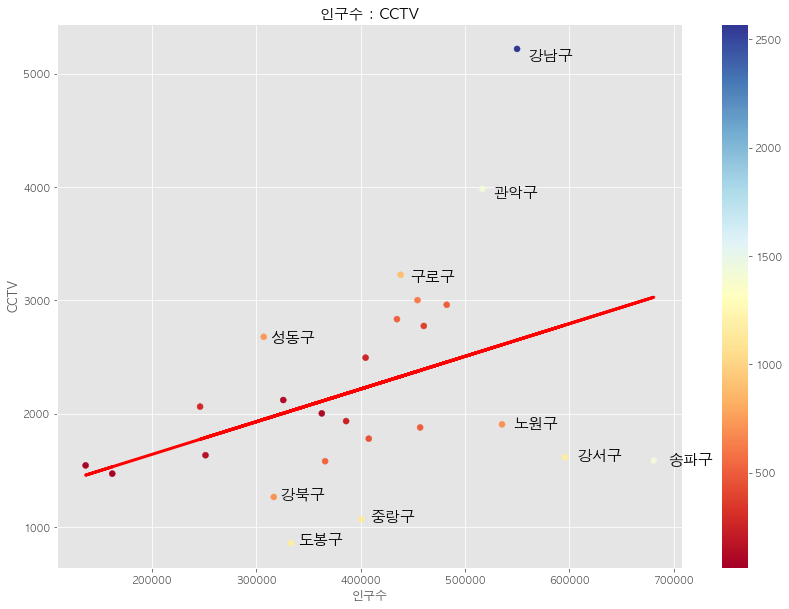

In [43]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], cmap='RdYlBu')
# 기준선
fx = data_result['인구수']
plt.plot(fx, f1(fx), color='red', linewidth=3, linestyle='-')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.title('인구수 : CCTV')
plt.colorbar()

# 오차가 가장 큰 10개 구에 텍스트 붙이기
for i in range(10):
    plt.text(data_result['인구수'][i]*1.02, data_result['소계'][i]*0.98, data_result.index[i], size=15)